<a href="https://colab.research.google.com/github/Uttumon/Big_Data_Analytics/blob/main/BDA3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data loaded successfully. Shape: (1000, 5)

Data Exploration:
----------------
Basic Statistics:
       square_feet     bedrooms    bathrooms          age          price
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.000000
mean   2009.666028     3.045000     1.985000    24.583000  386650.626309
std     489.607969     1.424431     0.835148    14.630077   95414.514712
min     379.366330     1.000000     1.000000     0.000000   73068.505478
25%    1676.204847     2.000000     1.000000    12.000000  320176.724487
50%    2012.650306     3.000000     2.000000    25.000000  383508.331304
75%    2323.971938     4.000000     3.000000    37.000000  451340.983124
max    3926.365745     5.000000     3.000000    49.000000  664525.281185

Missing Values:
square_feet    0
bedrooms       0
bathrooms      0
age            0
price          0
dtype: int64

Correlation Matrix:
             square_feet  bedrooms  bathrooms       age     price
square_feet     1.000000 -0.028081   0.05733

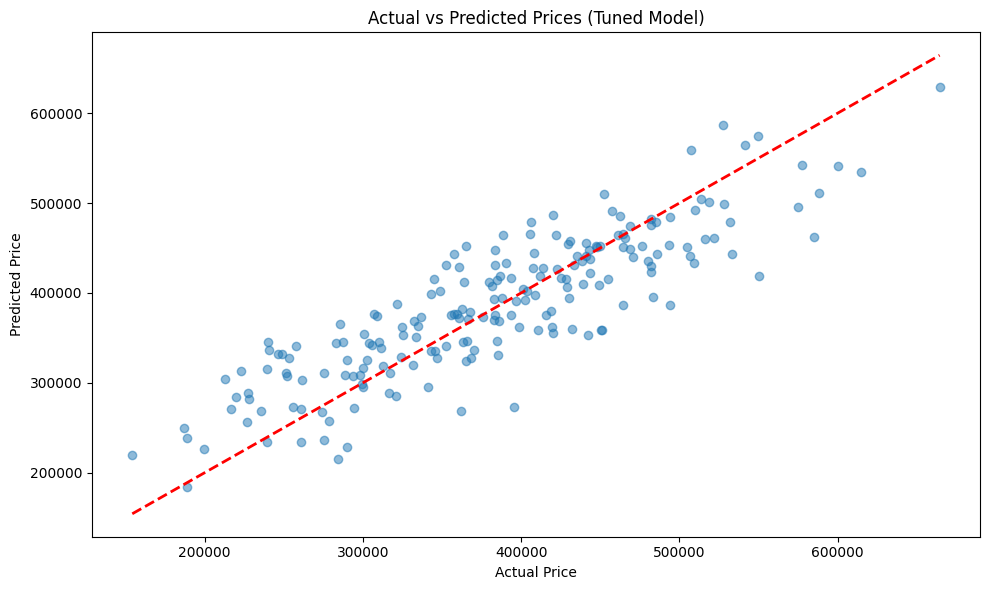


Model Iteration Suggestions:
1. Expand parameter grid for finer tuning
2. Try other models (e.g., RandomForest, XGBoost)
3. Add feature engineering
4. Collect more diverse data

Feature Importance:
       Feature   Coefficient
0  square_feet  71939.029364
1     bedrooms  28516.710752
2    bathrooms  18636.998424
3          age  15923.170192


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from datetime import datetime

class PredictiveModelPipeline:
    def __init__(self):
        self.data = None
        self.X = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.model = None
        self.scaler = StandardScaler()
        self.metrics_history = []
        self.best_params = None

    def load_data(self):
        """Step 1: Data Collection and Loading"""
        np.random.seed(42)
        n_samples = 1000

        self.data = pd.DataFrame({
            'square_feet': np.random.normal(2000, 500, n_samples),
            'bedrooms': np.random.randint(1, 6, n_samples),
            'bathrooms': np.random.randint(1, 4, n_samples),
            'age': np.random.randint(0, 50, n_samples),
            'price': np.random.normal(300000, 100000, n_samples)
        })

        self.data['price'] = (self.data['square_feet'] * 150 +
                            self.data['bedrooms'] * 20000 +
                            self.data['bathrooms'] * 25000 -
                            self.data['age'] * 1000 +
                            np.random.normal(0, 50000, n_samples))

        print("Data loaded successfully. Shape:", self.data.shape)
        return self

    def explore_data(self):
        """Step 2: Data Exploration and Analysis"""
        print("\nData Exploration:")
        print("----------------")
        print("Basic Statistics:")
        print(self.data.describe())
        print("\nMissing Values:")
        print(self.data.isnull().sum())
        print("\nCorrelation Matrix:")
        print(self.data.corr())
        return self

    def preprocess_data(self):
        """Step 3: Data Preprocessing"""
        self.X = self.data.drop('price', axis=1)
        self.y = self.data['price']

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.X, self.y, test_size=0.2, random_state=42
        )

        self.X_train = self.scaler.fit_transform(self.X_train)
        self.X_test = self.scaler.transform(self.X_test)

        print("\nData preprocessed. Training set shape:", self.X_train.shape)
        return self

    def tune_hyperparameters(self):
        """Step 4: Hyperparameter Tuning"""
        # Define parameter grid for Ridge regression
        param_grid = {
            'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
            'fit_intercept': [True, False],
            'solver': ['auto', 'svd', 'cholesky', 'lsqr']
        }

        # Initialize base model
        base_model = Ridge(random_state=42)

        # Perform grid search with cross-validation
        grid_search = GridSearchCV(
            estimator=base_model,
            param_grid=param_grid,
            cv=5,  # 5-fold cross-validation
            scoring='neg_mean_squared_error',
            n_jobs=-1,
            verbose=1
        )

        # Fit the grid search
        grid_search.fit(self.X_train, self.y_train)

        # Store best parameters and model
        self.best_params = grid_search.best_params_
        self.model = grid_search.best_estimator_

        print("\nHyperparameter Tuning Results:")
        print("-----------------------------")
        print("Best Parameters:", self.best_params)
        print("Best Cross-Validation Score:", -grid_search.best_score_)
        return self

    def train_model(self):
        """Step 5: Model Training with Best Parameters"""
        if self.model is None:
            self.model = Ridge(random_state=42)

        self.model.fit(self.X_train, self.y_train)

        print("\nModel trained successfully with parameters:", self.best_params)
        print("Model coefficients:", self.model.coef_)
        print("Intercept:", self.model.intercept_)
        return self

    def evaluate_model(self):
        """Step 6: Model Evaluation"""
        y_pred_train = self.model.predict(self.X_train)
        y_pred_test = self.model.predict(self.X_test)

        metrics = {
            'timestamp': datetime.now(),
            'train_mse': mean_squared_error(self.y_train, y_pred_train),
            'test_mse': mean_squared_error(self.y_test, y_pred_test),
            'train_r2': r2_score(self.y_train, y_pred_train),
            'test_r2': r2_score(self.y_test, y_pred_test)
        }

        self.metrics_history.append(metrics)

        print("\nModel Evaluation:")
        print("----------------")
        print(f"Training MSE: {metrics['train_mse']:,.2f}")
        print(f"Testing MSE: {metrics['test_mse']:,.2f}")
        print(f"Training R²: {metrics['train_r2']:.3f}")
        print(f"Testing R²: {metrics['test_r2']:.3f}")
        return self

    def visualize_results(self):
        """Step 7: Results Visualization"""
        y_pred = self.model.predict(self.X_test)

        plt.figure(figsize=(10, 6))
        plt.scatter(self.y_test, y_pred, alpha=0.5)
        plt.plot([self.y_test.min(), self.y_test.max()],
                [self.y_test.min(), self.y_test.max()],
                'r--', lw=2)
        plt.xlabel('Actual Price')
        plt.ylabel('Predicted Price')
        plt.title('Actual vs Predicted Prices (Tuned Model)')
        plt.tight_layout()
        plt.show()

        return self

    def iterate_improvement(self):
        """Step 8: Model Iteration"""
        print("\nModel Iteration Suggestions:")
        print("1. Expand parameter grid for finer tuning")
        print("2. Try other models (e.g., RandomForest, XGBoost)")
        print("3. Add feature engineering")
        print("4. Collect more diverse data")

        feature_importance = pd.DataFrame({
            'Feature': self.X.columns,
            'Coefficient': abs(self.model.coef_)
        })
        print("\nFeature Importance:")
        print(feature_importance.sort_values('Coefficient', ascending=False))

        return self

    def run_full_pipeline(self):
        """Execute the complete data science lifecycle"""
        (self.load_data()
            .explore_data()
            .preprocess_data()
            .tune_hyperparameters()
            .train_model()
            .evaluate_model()
            .visualize_results()
            .iterate_improvement())
        return self

# Execute the pipeline
if __name__ == "__main__":
    pipeline = PredictiveModelPipeline()
    pipeline.run_full_pipeline()